In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [2]:
df = pd.read_csv("/kaggle/input/shopping-trends-analysis/shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1713,1714,49,Male,Jacket,Outerwear,22,Missouri,M,Pink,Winter,4.60,No,Free Shipping,No,No,37,PayPal,Quarterly
973,974,60,Male,Jacket,Outerwear,75,Colorado,M,Teal,Fall,3.50,Yes,2-Day Shipping,Yes,Yes,30,Bank Transfer,Quarterly
1576,1577,56,Male,Dress,Clothing,75,Michigan,M,White,Spring,3.70,No,2-Day Shipping,Yes,Yes,36,PayPal,Monthly
558,559,50,Male,Sneakers,Footwear,77,Iowa,L,Teal,Fall,3.20,Yes,Express,Yes,Yes,43,Debit Card,Every 3 Months
2037,2038,39,Male,Belt,Accessories,87,Illinois,S,Green,Summer,4.30,No,Express,No,No,7,Venmo,Bi-Weekly


In [3]:
df.shape

(3900, 18)

In [4]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.00","3,900.00","3,900.00","3,900.00","3,900.00"
mean,"1,950.50",44.07,59.76,3.75,25.35
std,"1,125.98",15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,"1,950.50",44.00,60.00,3.70,25.00
75%,"2,925.25",57.00,81.00,4.40,38.00
max,"3,900.00",70.00,100.00,5.00,50.00


In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
df.duplicated().sum()

0

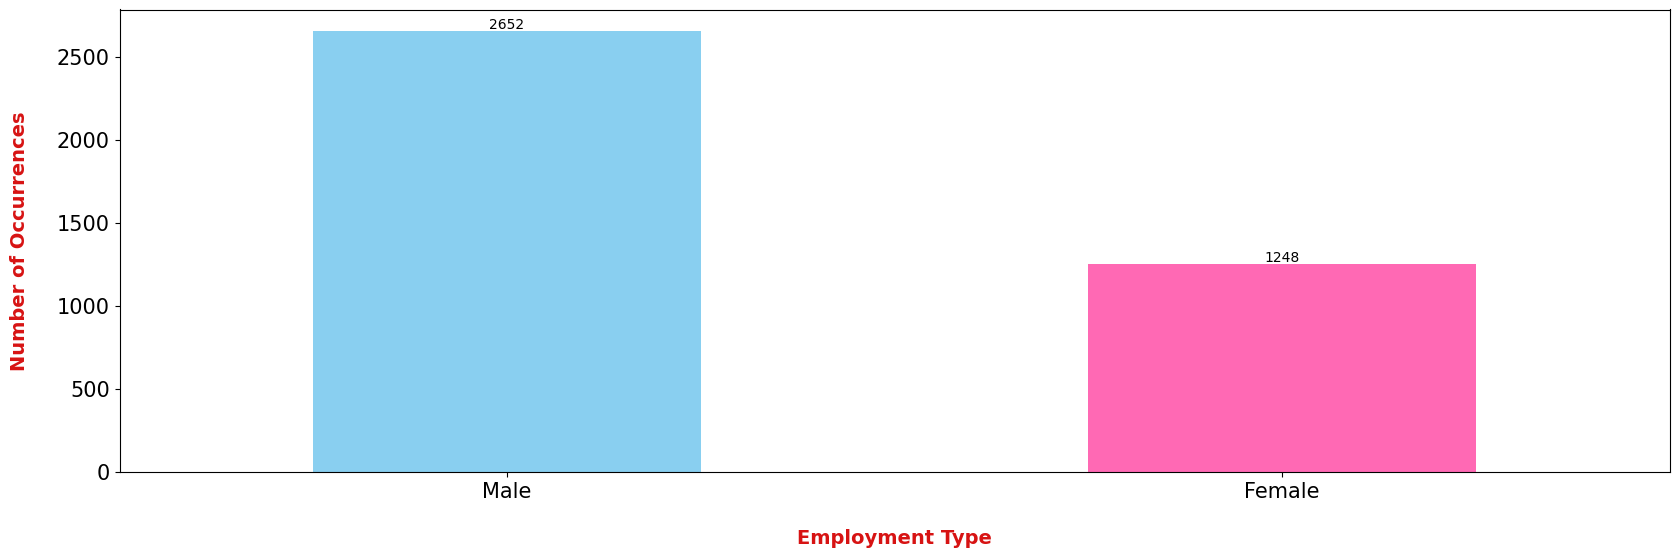

In [9]:
plt.figure(figsize = (20, 6))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

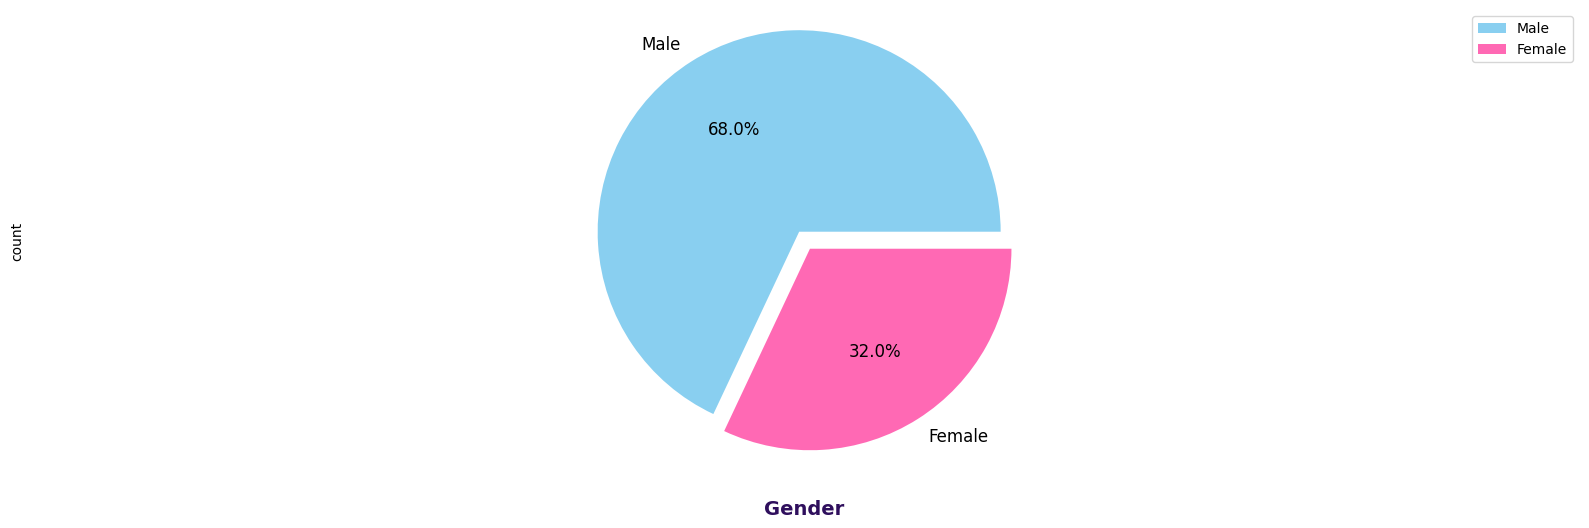

In [10]:
plt.figure(figsize = (20, 6))

counts = df["Gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

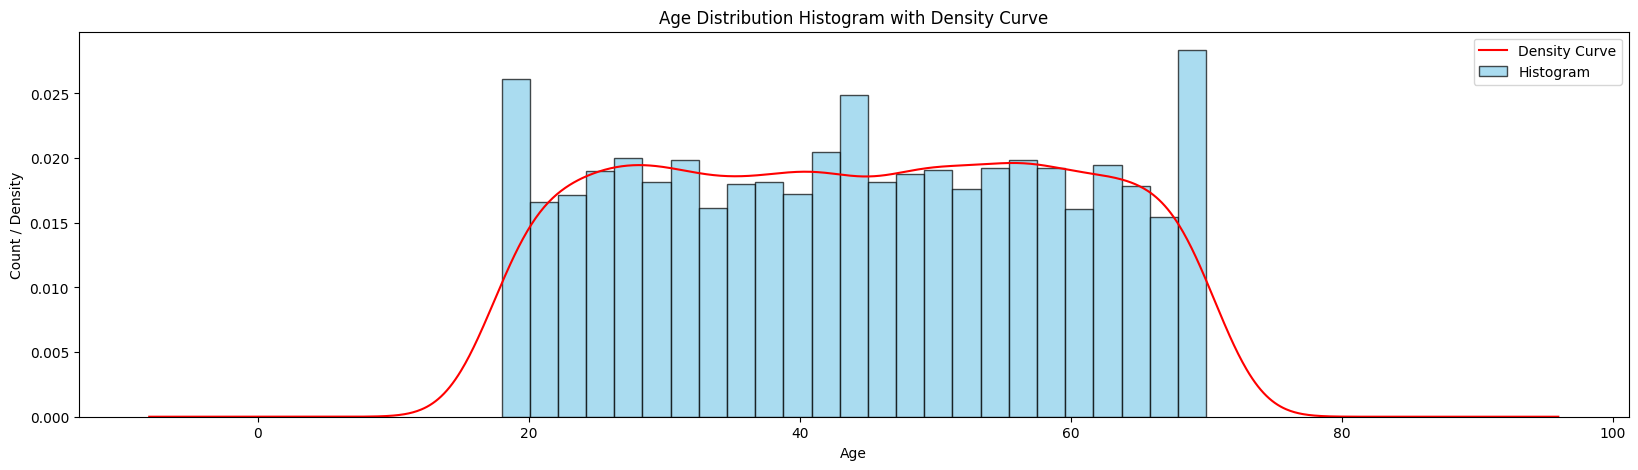

In [11]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [12]:
df["Category"].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

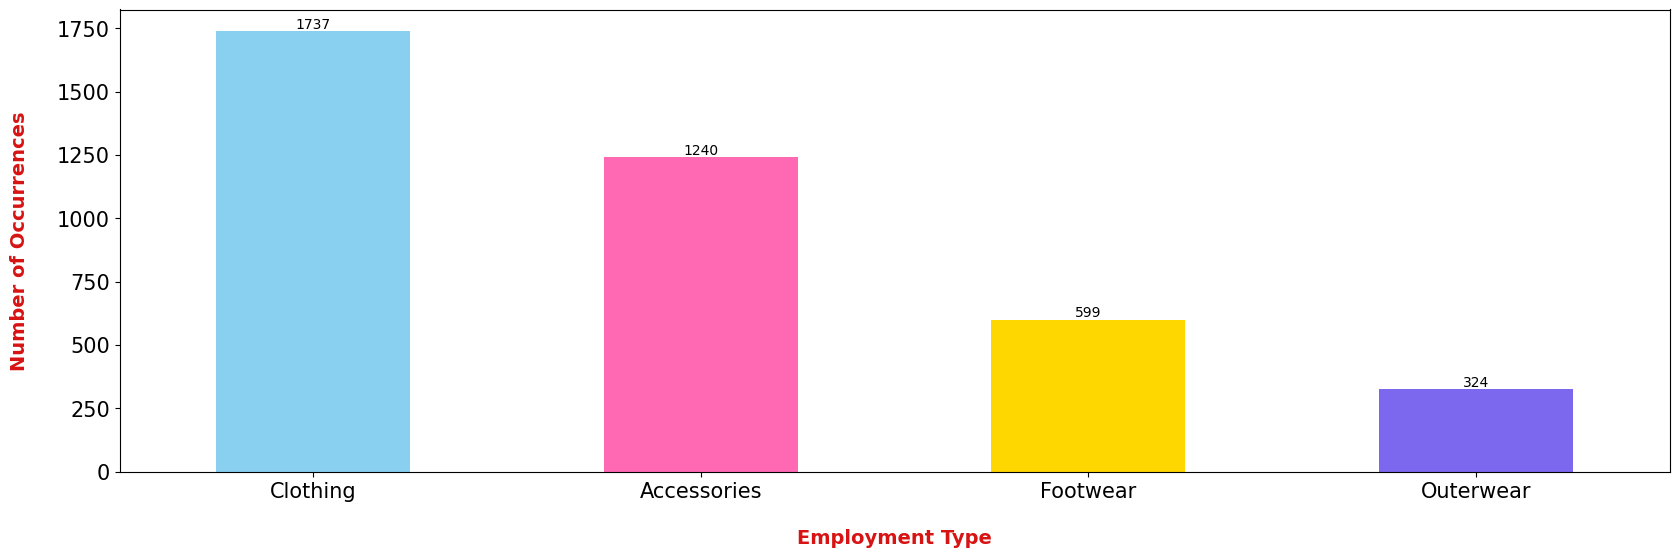

In [13]:
plt.figure(figsize = (20, 6))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

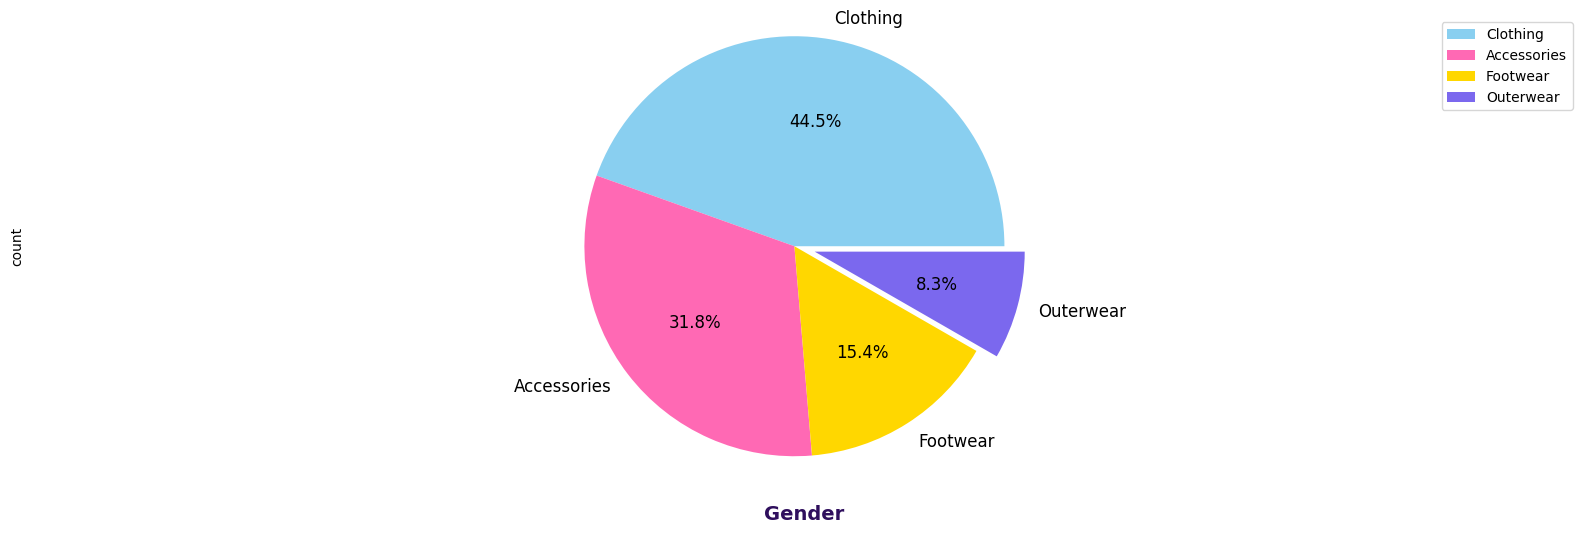

In [14]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [15]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

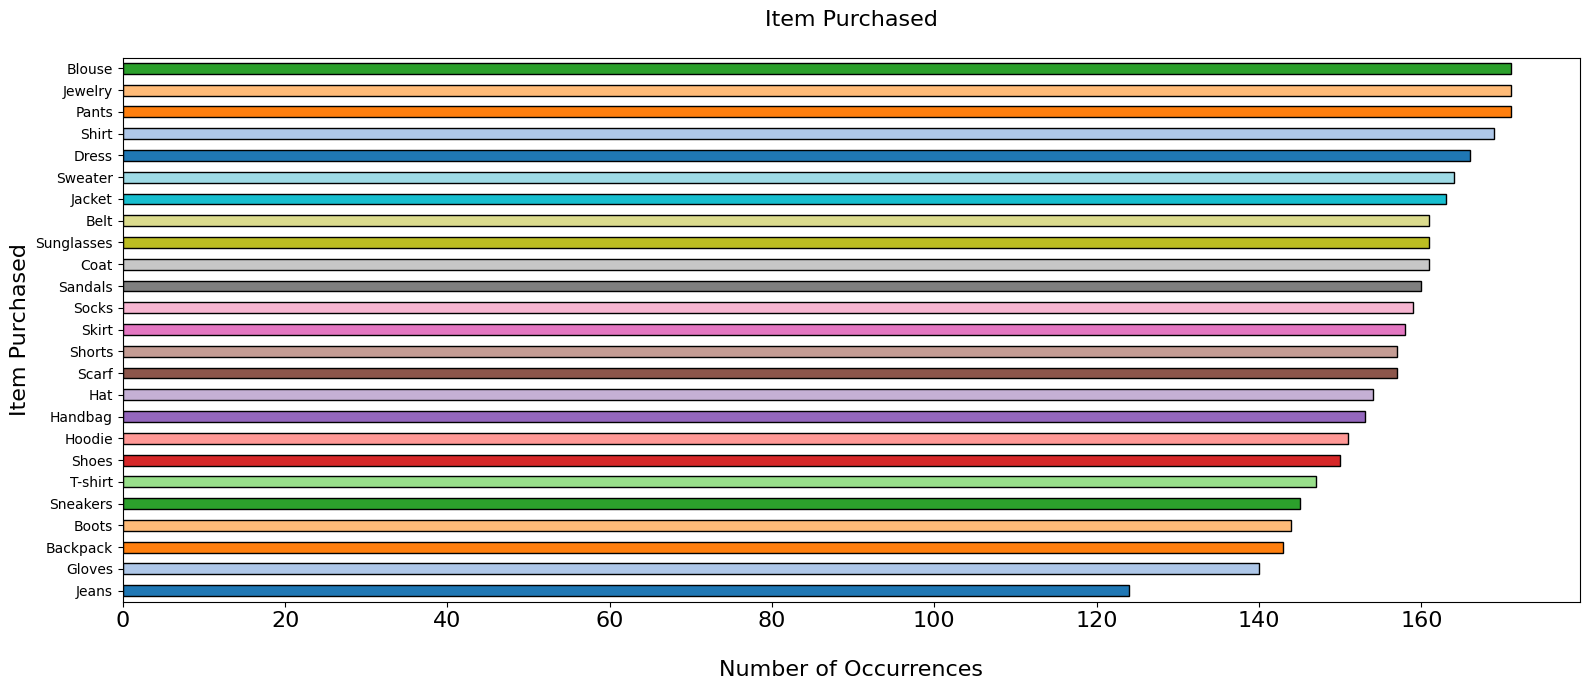

In [16]:
plt.figure(figsize = (16, 7))
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [17]:
df["Location"].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Ariz

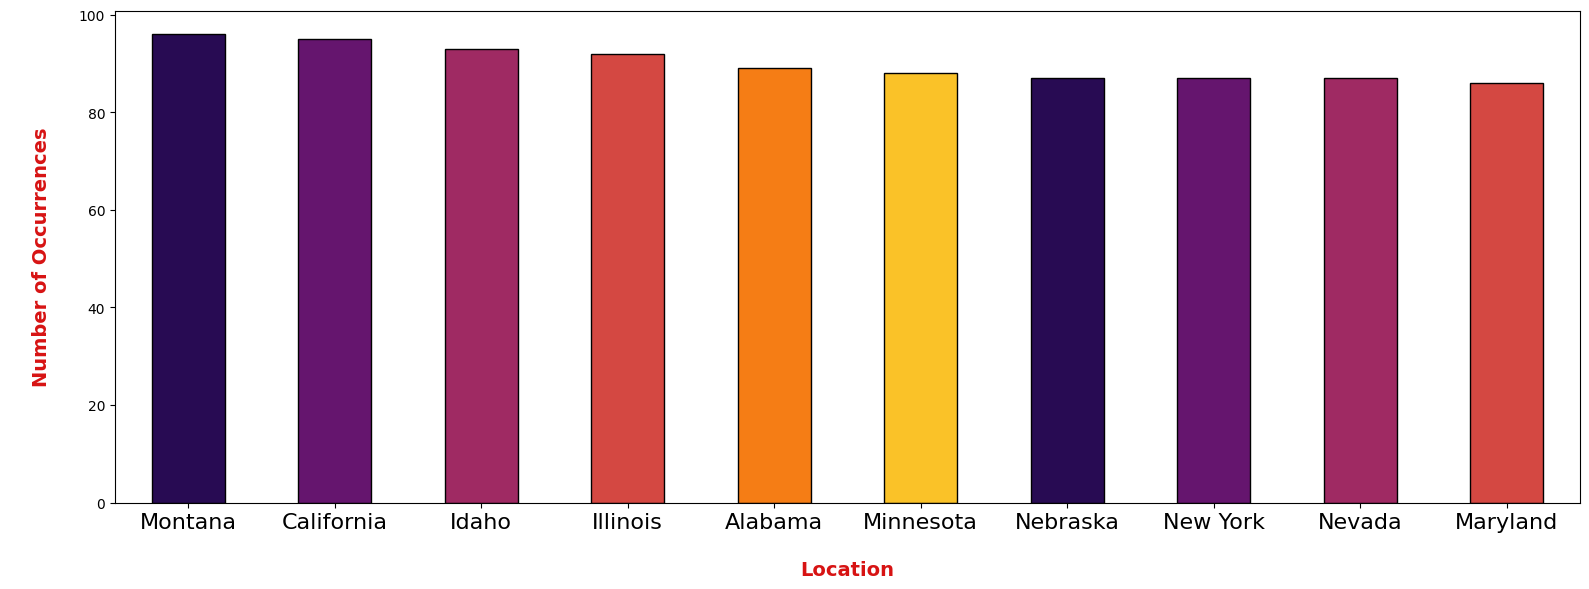

In [18]:
plt.figure(figsize = (16, 6))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [19]:
df["Size"].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

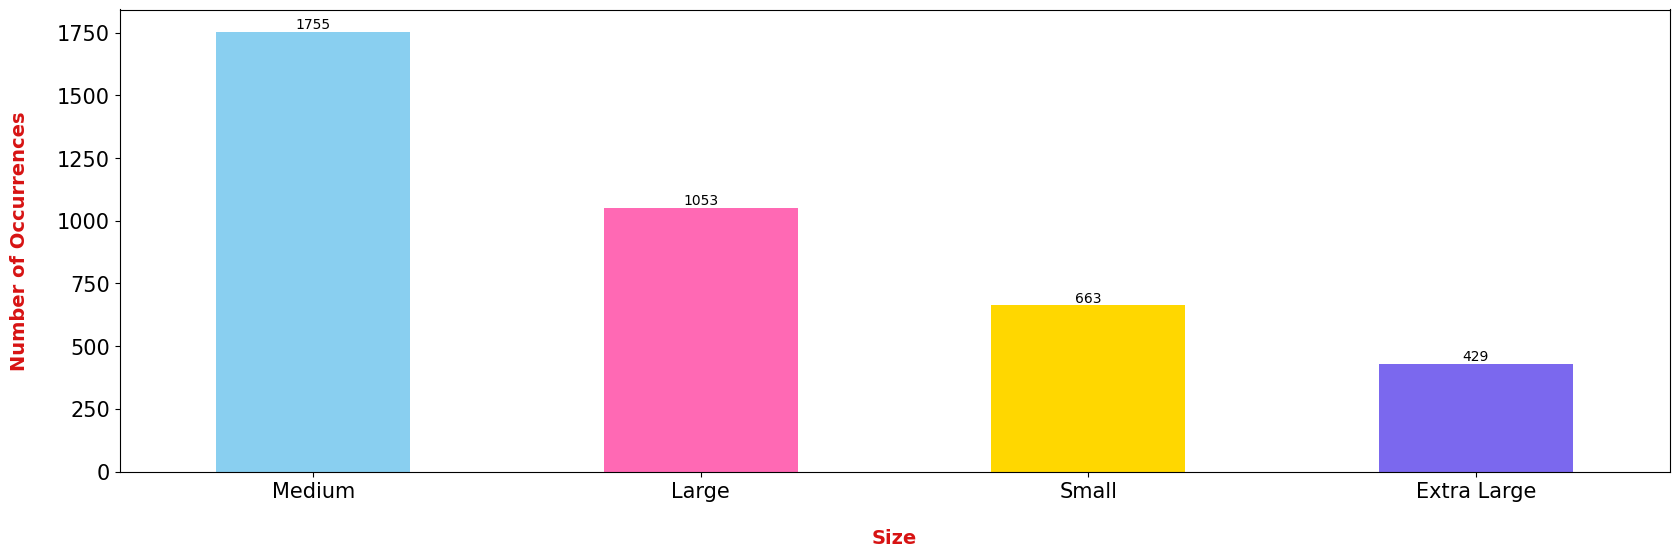

In [20]:
plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

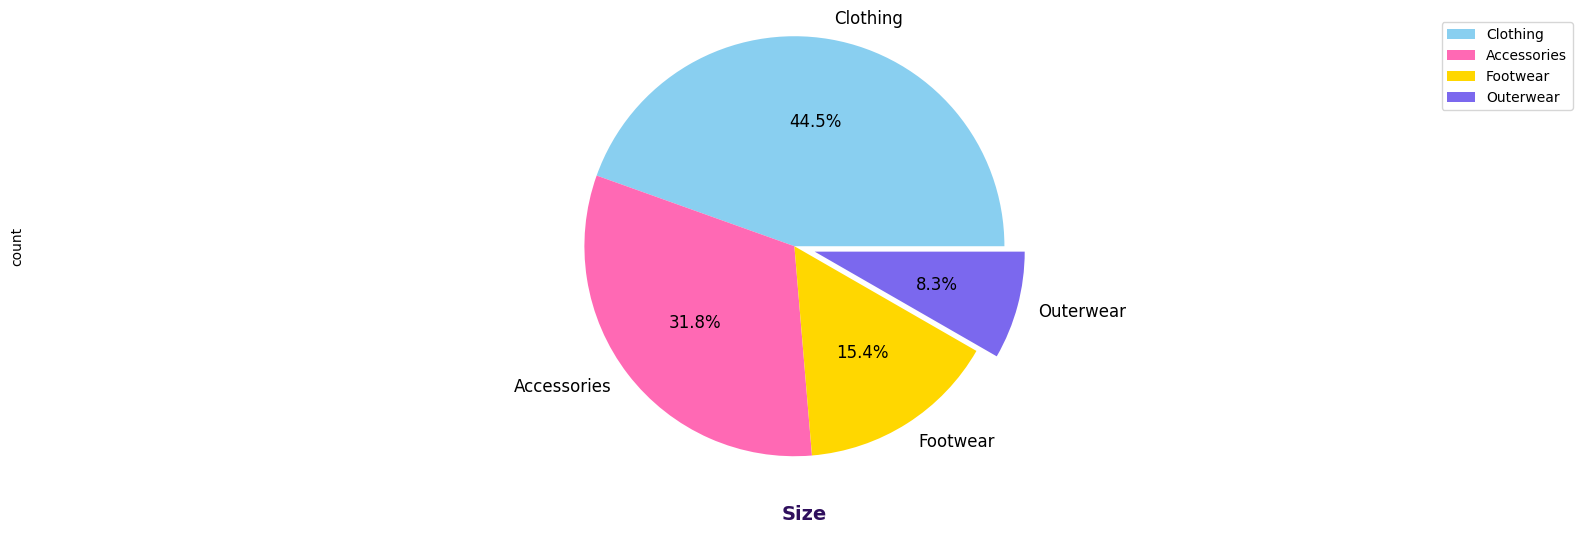

In [21]:
plt.figure(figsize = (20, 6))

counts = df["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [22]:
df["Color"].value_counts()

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Magenta      152
Blue         152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64

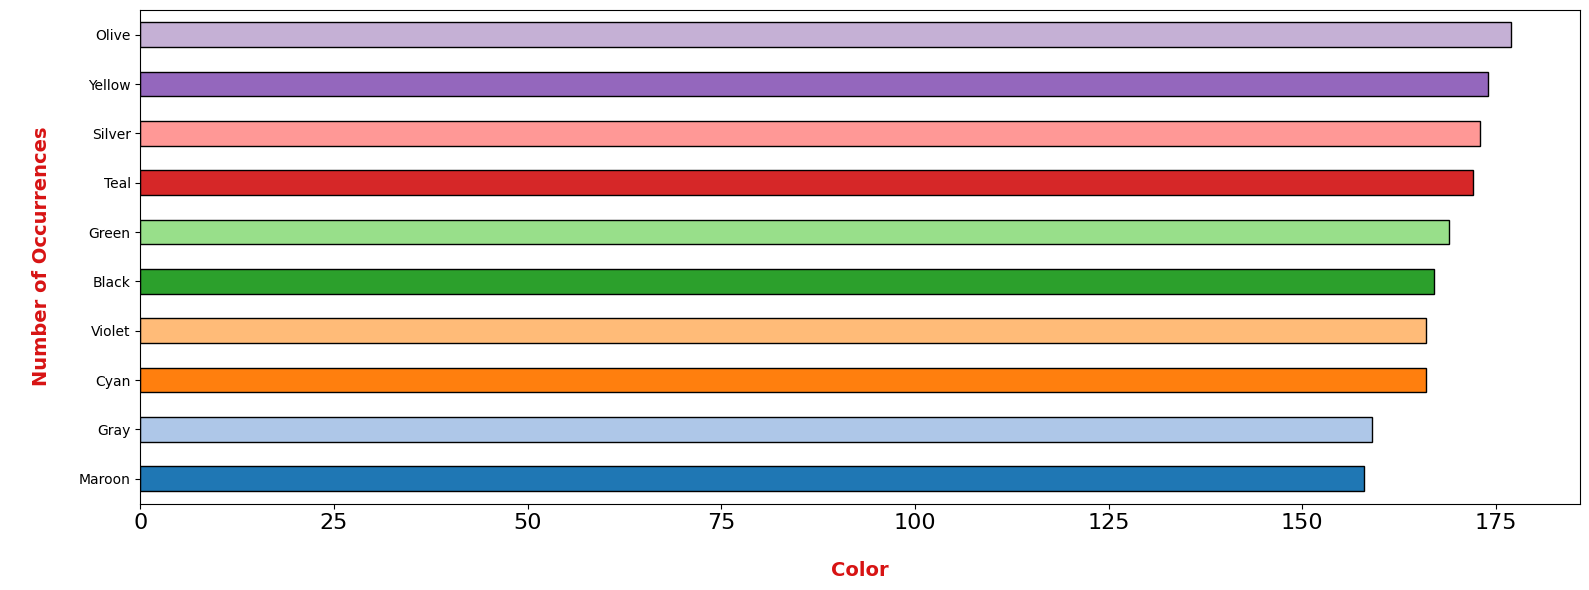

In [23]:
plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [24]:
df["Season"].value_counts()

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

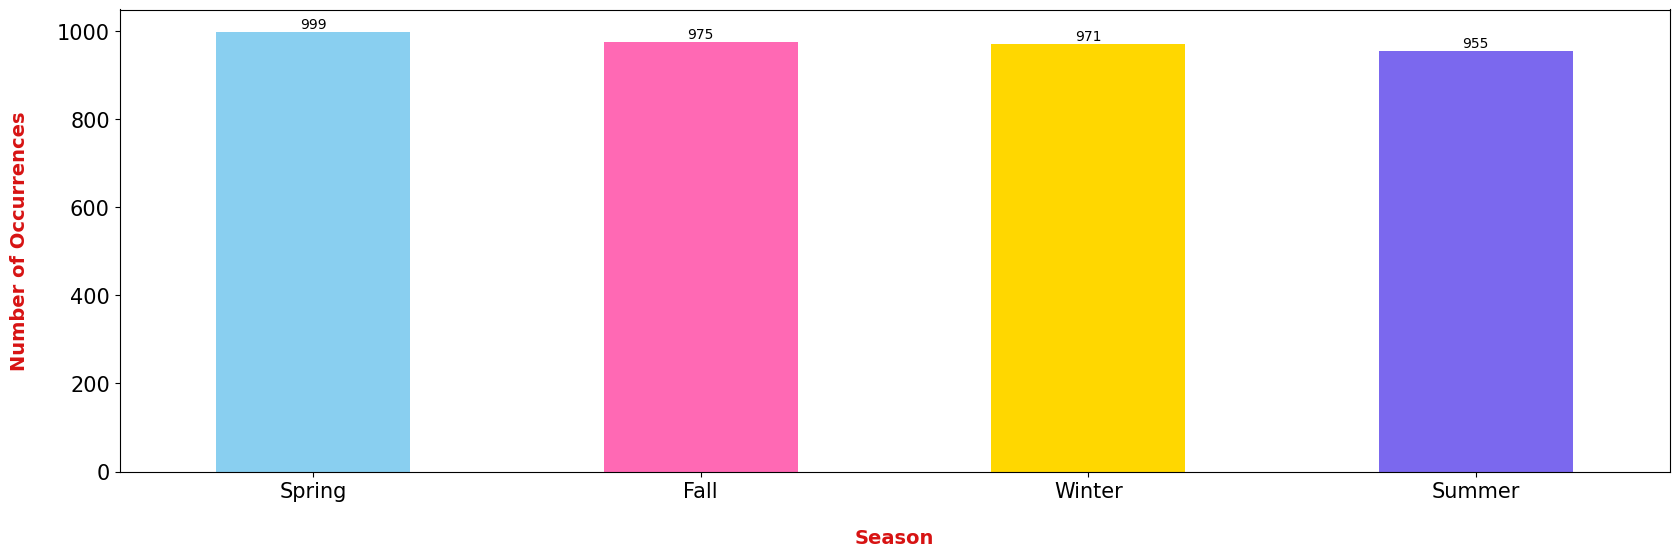

In [25]:
plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

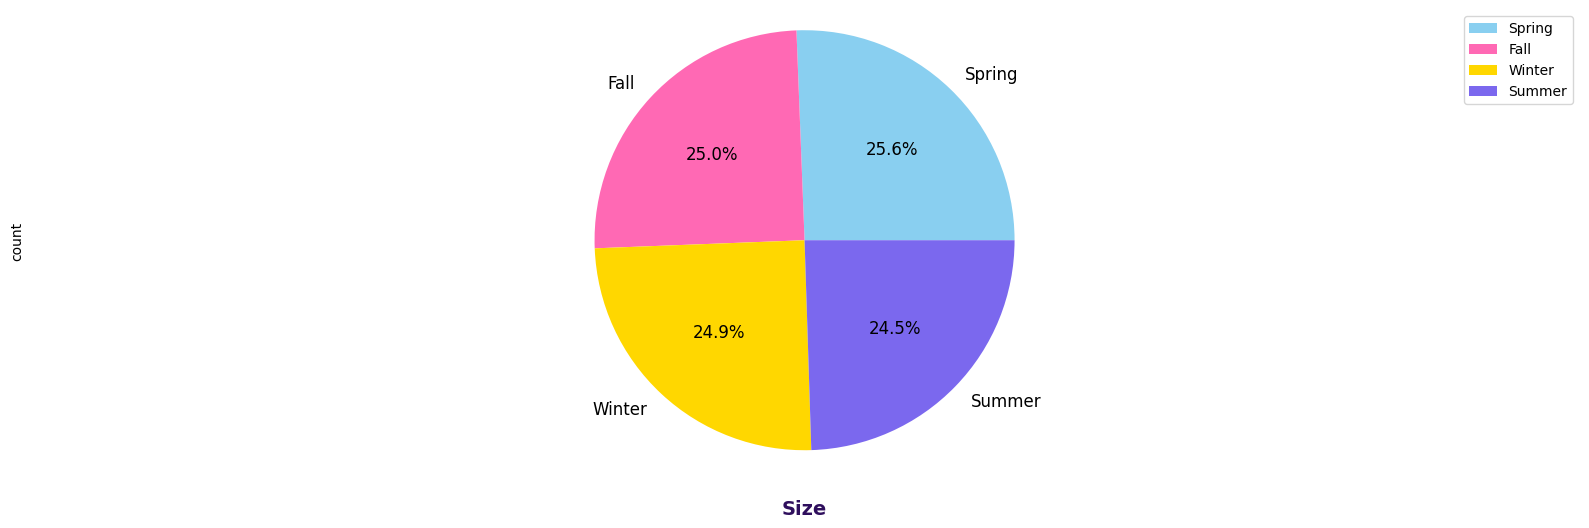

In [26]:
plt.figure(figsize = (20, 6))

counts = df["Season"].value_counts()
explode = (0, 0, 0, 0)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [28]:
df["Subscription Status"].value_counts()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

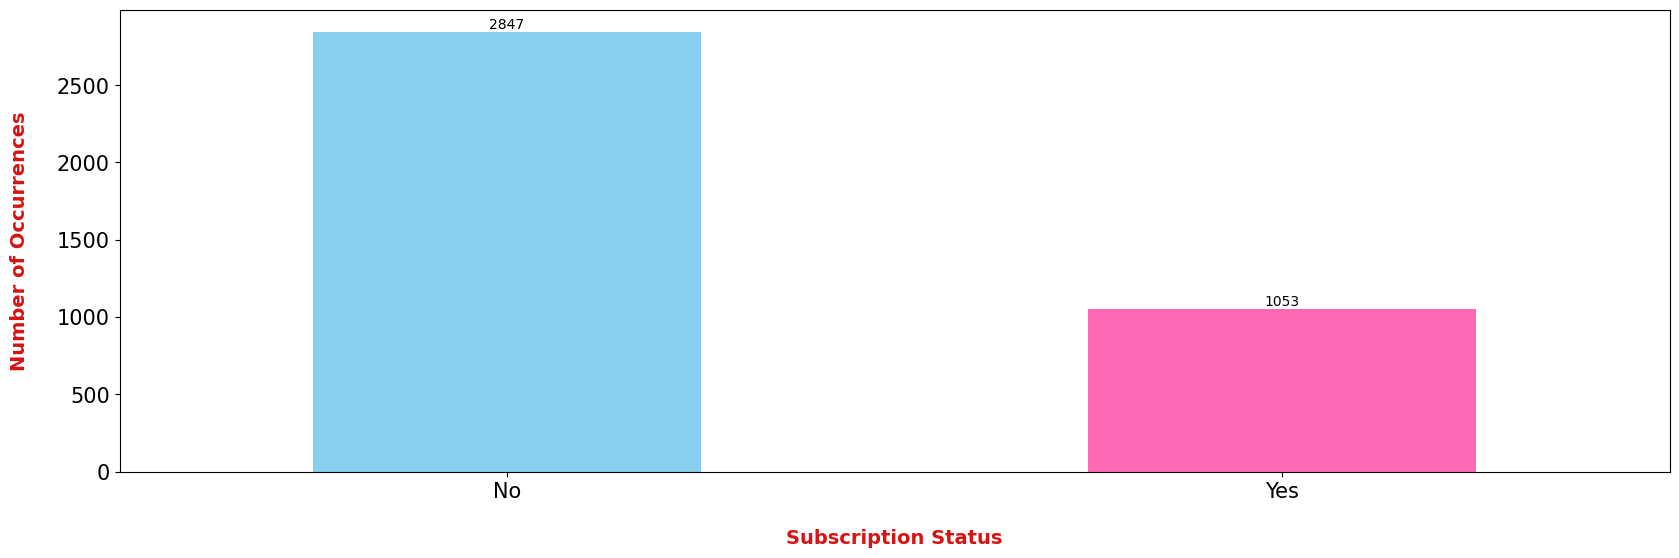

In [29]:
plt.figure(figsize = (20, 6))
ax = df["Subscription Status"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('No', 'Yes'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Subscription Status', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

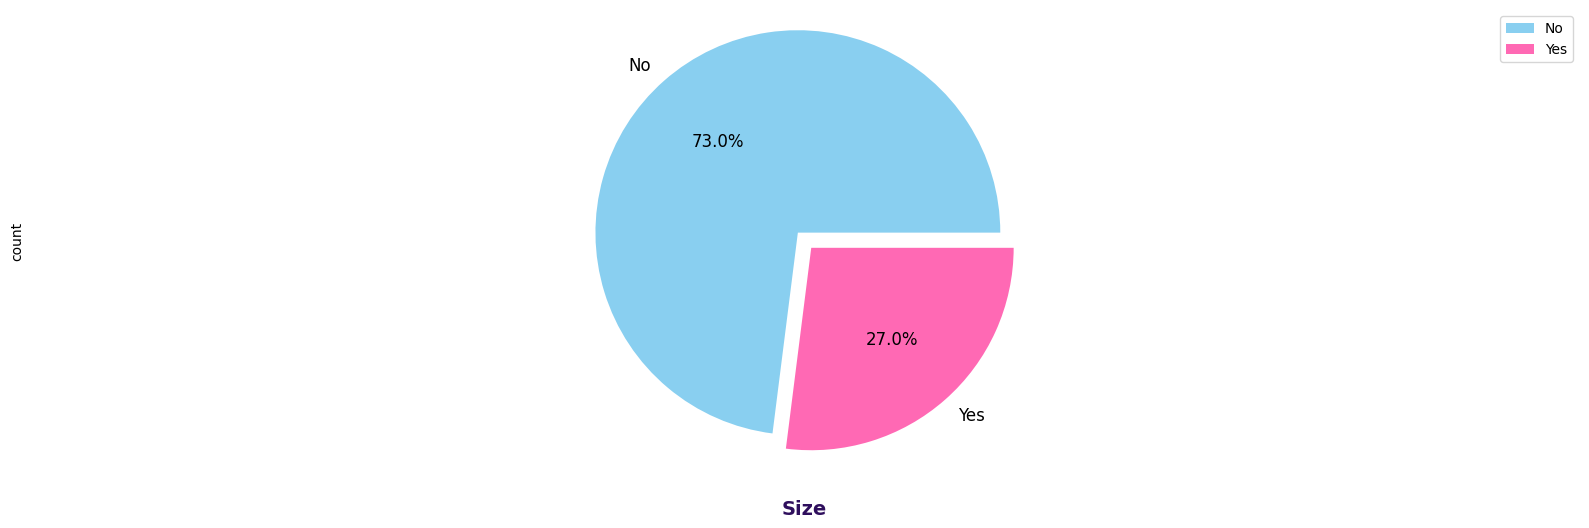

In [30]:
plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [31]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

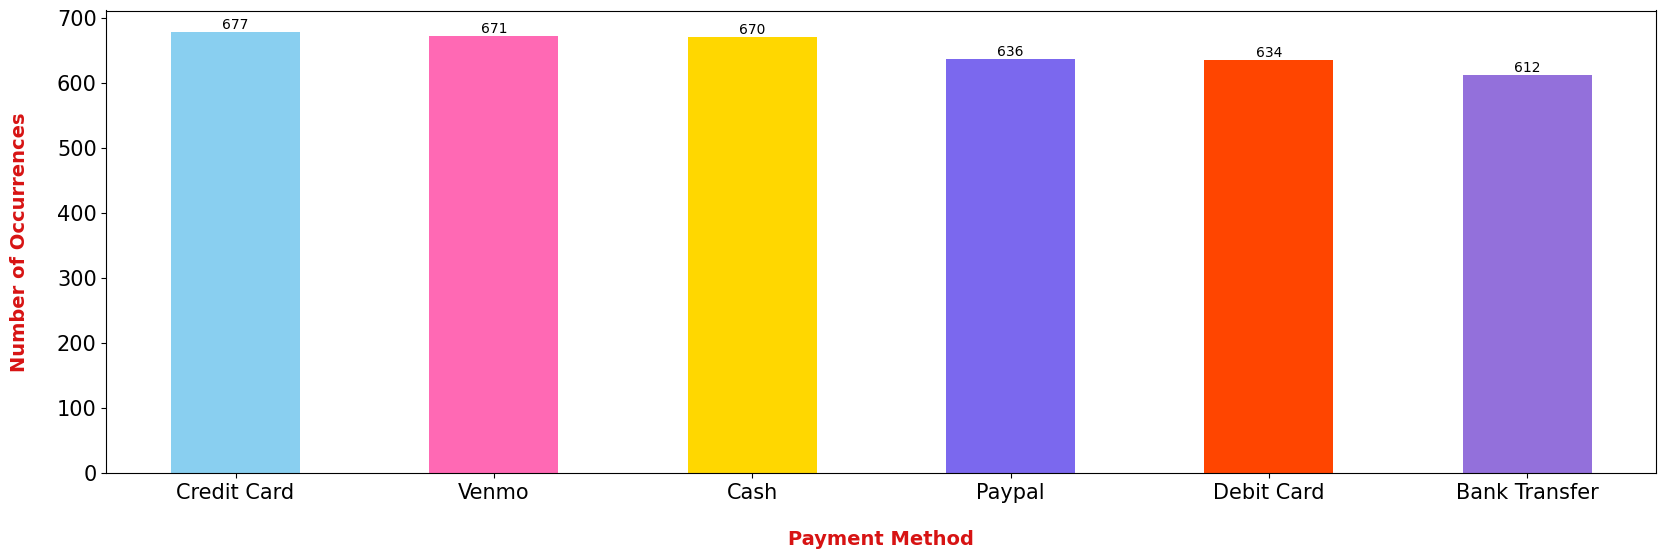

In [32]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

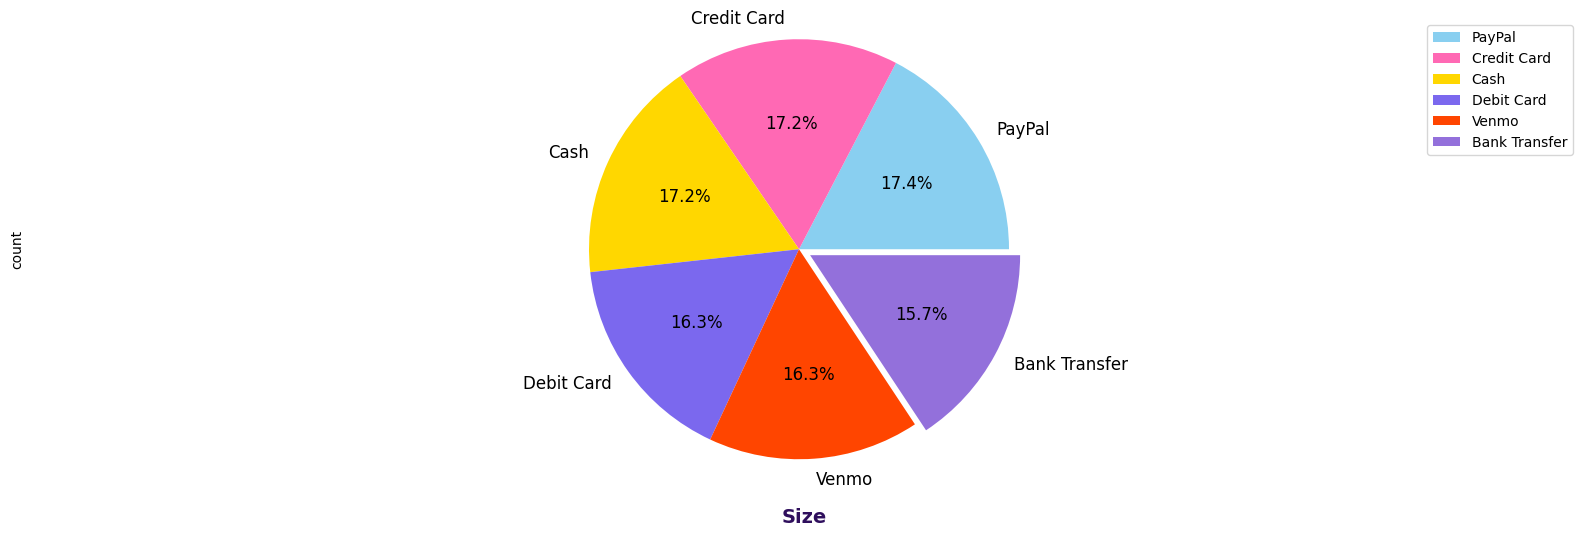

In [33]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [34]:
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

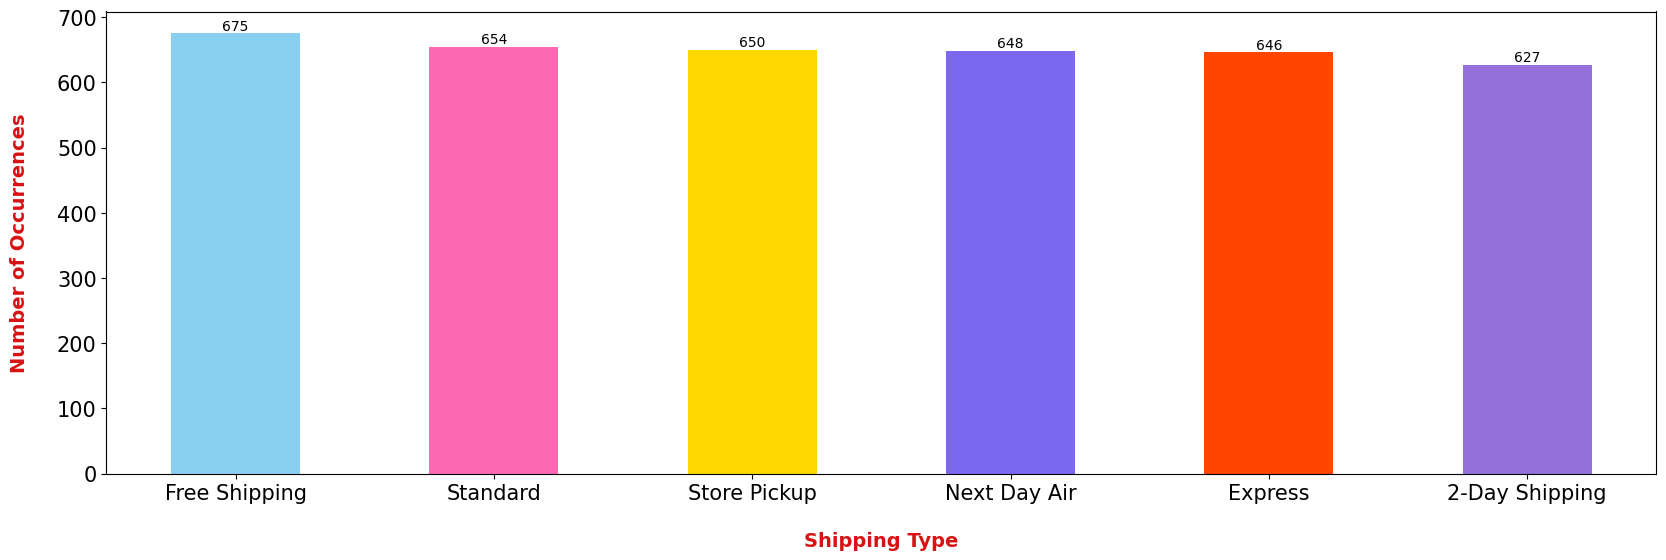

In [35]:
plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

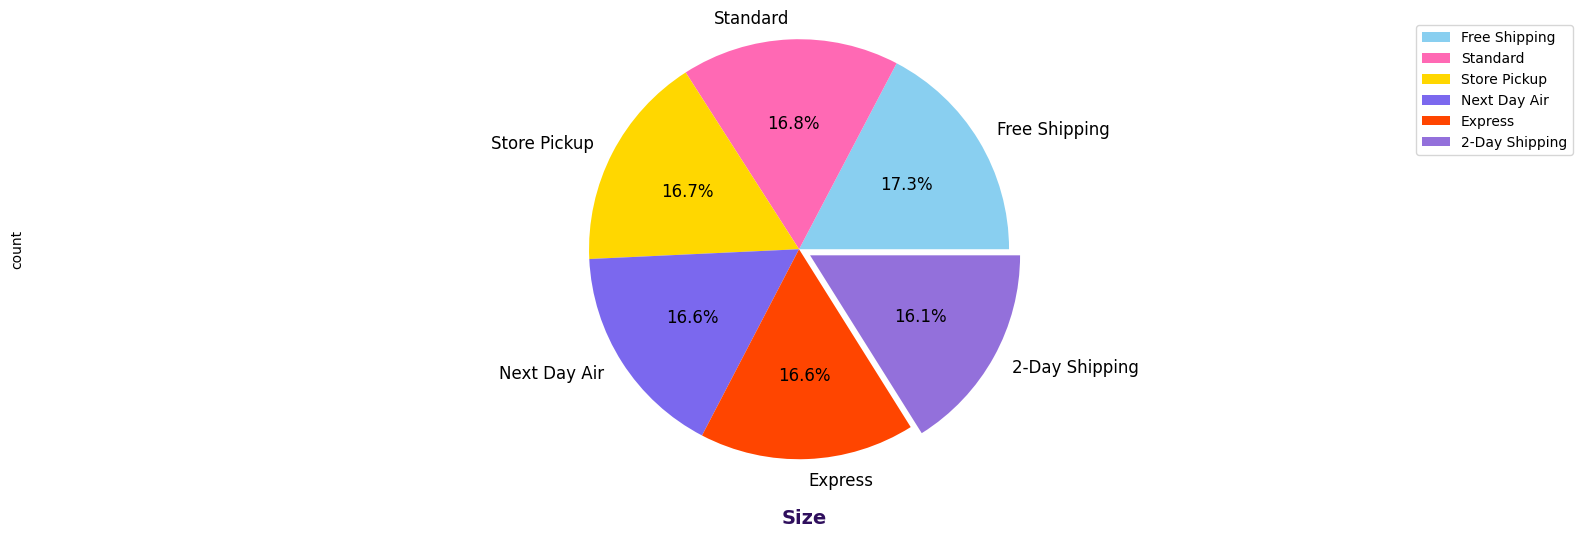

In [36]:
plt.figure(figsize = (20, 6))

counts = df["Shipping Type"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [37]:
df["Payment Method"].value_counts()

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64

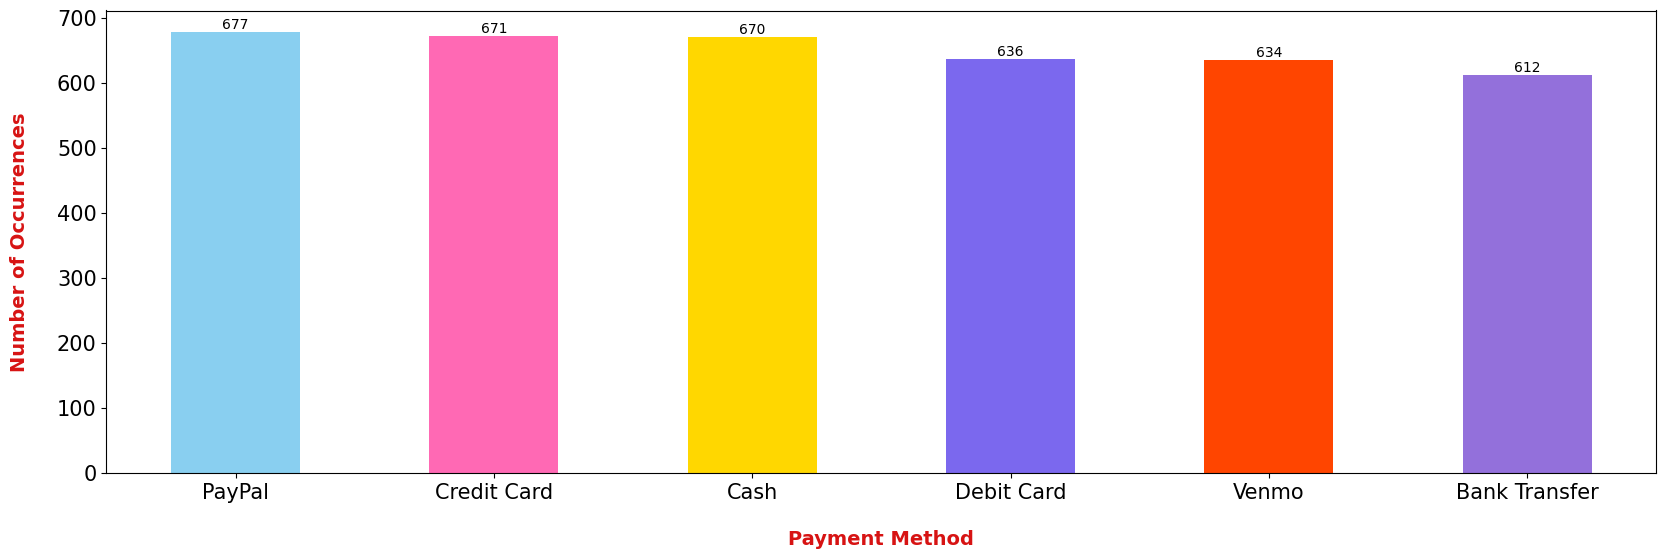

In [38]:
plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('PayPal', 'Credit Card', 'Cash', 'Debit Card', 'Venmo', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);


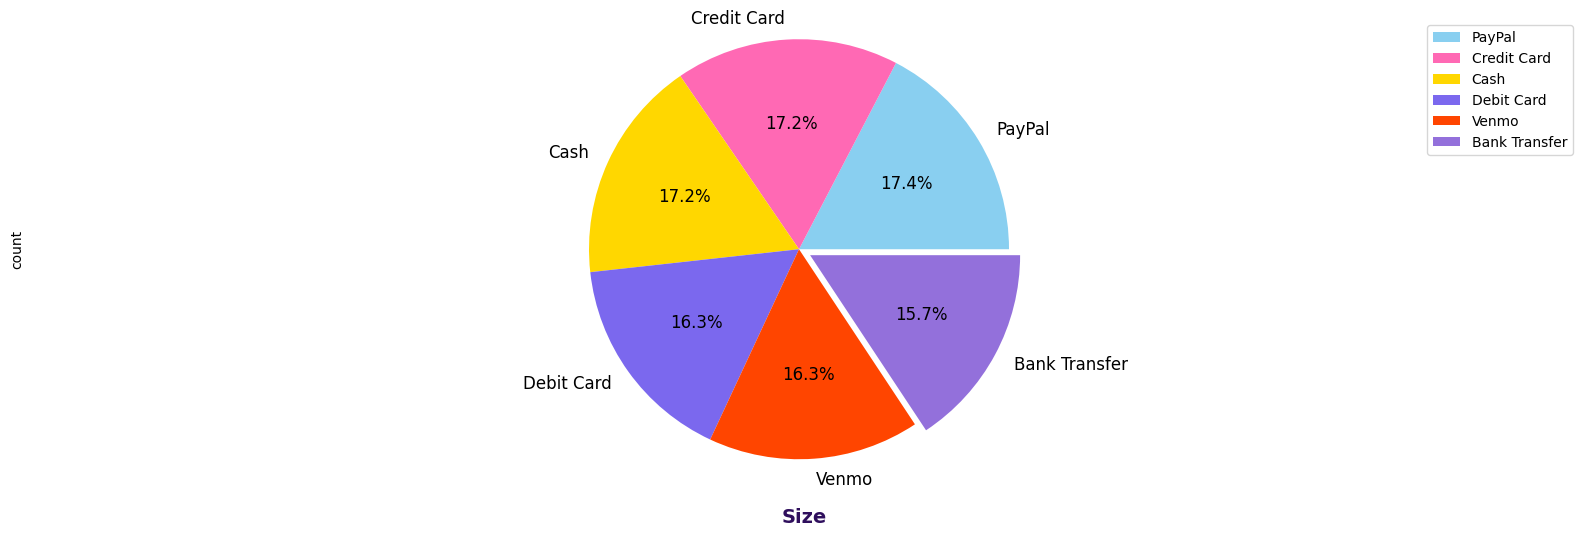

In [39]:
plt.figure(figsize = (20, 6))

counts = df["Payment Method"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [40]:
df["Frequency of Purchases"].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64

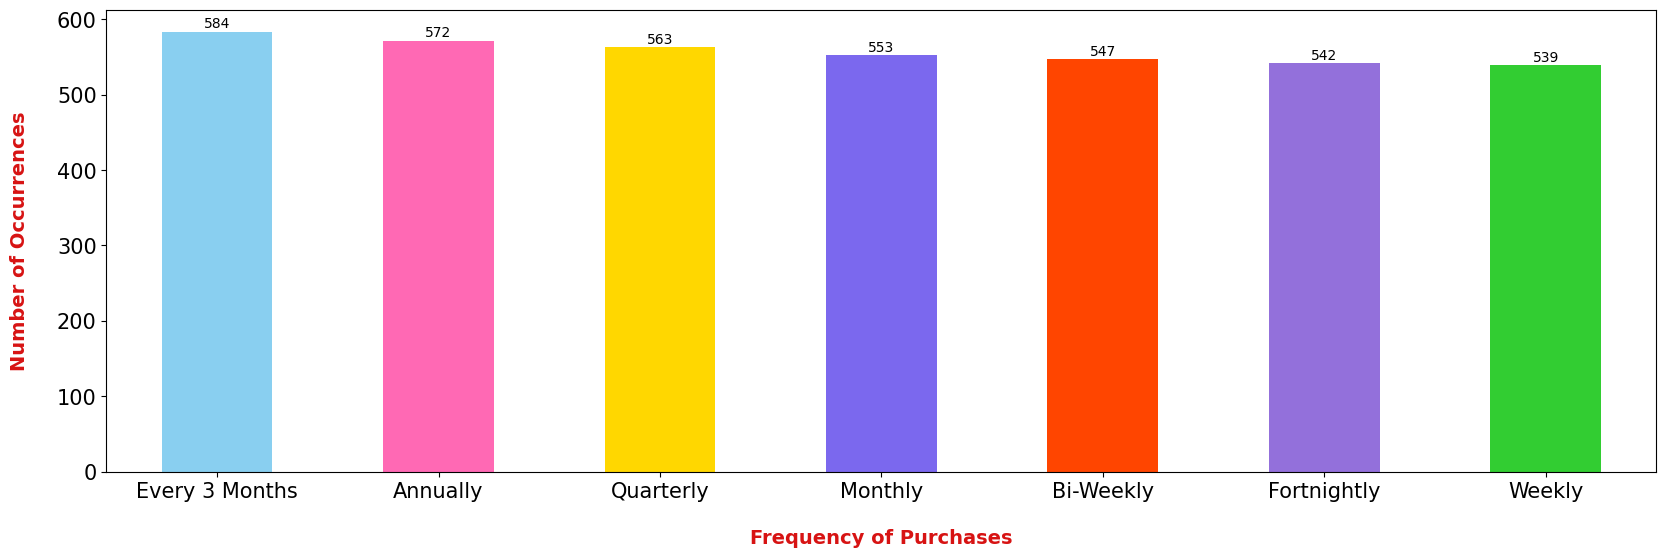

In [41]:
plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

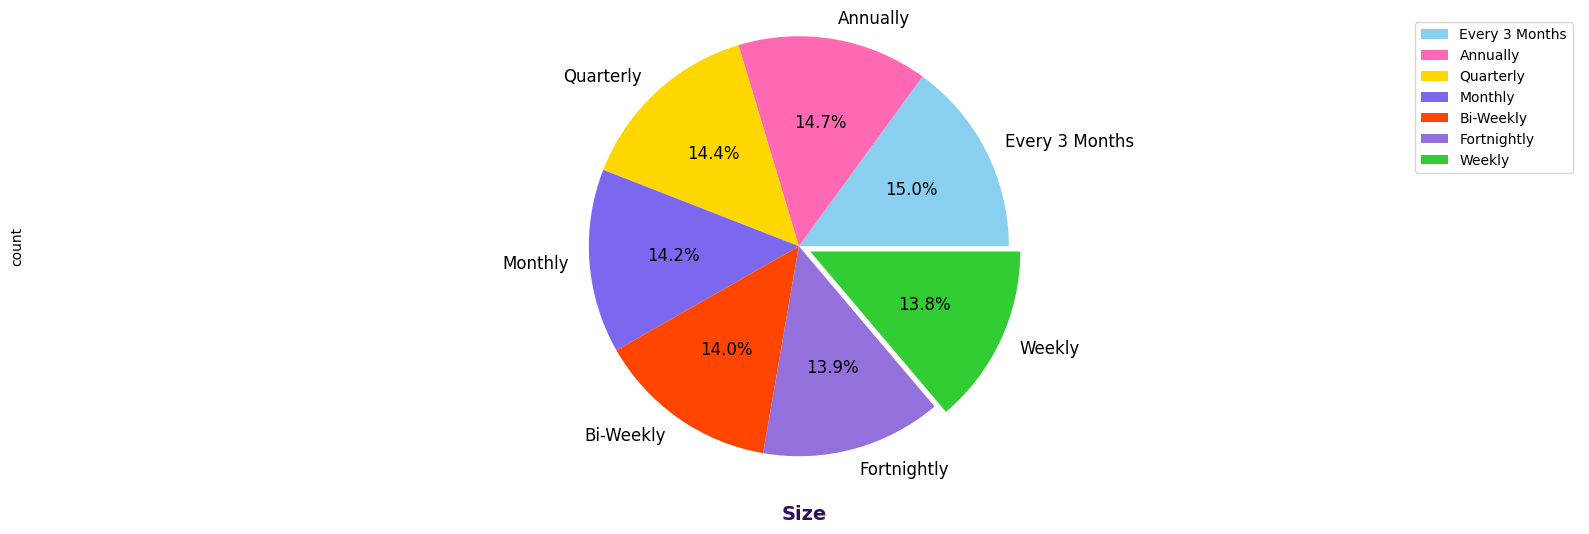

In [42]:
plt.figure(figsize = (20, 6))

counts = df["Frequency of Purchases"].value_counts()
explode = (0, 0, 0, 0, 0.0, 0, 0.06)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Size', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

In [43]:
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [44]:
most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


In [45]:
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [46]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


In [47]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


In [48]:
median_purchase_amount = df['Purchase Amount (USD)'].median()
print("Median Purchase Amount (USD):", median_purchase_amount)

Median Purchase Amount (USD): 60.0


In [49]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


In [50]:
avg_purchase_subscription_yes = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)'].mean()
avg_purchase_subscription_no = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Subscription 'Yes':", avg_purchase_subscription_yes)
print("Average Purchase Amount for Subscription 'No':", avg_purchase_subscription_no)

Average Purchase Amount for Subscription 'Yes': 59.49192782526116
Average Purchase Amount for Subscription 'No': 59.865121180189675


In [51]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [52]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


In [53]:
average_age_summer = df[df['Season'] == 'Summer']['Age'].mean()
print("Average Age of Customers in the Summer Season:", average_age_summer)

Average Age of Customers in the Summer Season: 43.973821989528794


In [54]:
promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of Customers who used Promo Code:", promo_code_count)

Number of Customers who used Promo Code: 1677


In [55]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [56]:
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)

Most Common Shipping Type for High Review Ratings: Standard


In [57]:
customers_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Customer ID'].count()
print("Number of Customers with more than 30 Previous Purchases:", customers_above_30_previous_purchases)

Number of Customers with more than 30 Previous Purchases: 1549


In [58]:
avg_purchase_above_30_previous_purchases = df[df['Previous Purchases'] > 30]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with more than 30 Previous Purchases:", avg_purchase_above_30_previous_purchases)

Average Purchase Amount for Customers with more than 30 Previous Purchases: 60.02840542285345


In [60]:
total_purchase_free_shipping = df[df['Shipping Type'] == 'Free Shipping']['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for 'Free Shipping' Shipping Type:", total_purchase_free_shipping)

avg_purchase_with_discount = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Discount Applied:", avg_purchase_with_discount)

Total Purchase Amount for 'Free Shipping' Shipping Type: 40777
Average Purchase Amount for Customers with Discount Applied: 59.27906976744186


In [61]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


In [62]:
average_age_high_rating_promo = df[(df['Review Rating'] > 4) & (df['Promo Code Used'] == 'Yes')]['Age'].mean()
print("Average Age of Customers with High Review Ratings and Promo Code Used:", average_age_high_rating_promo)

Average Age of Customers with High Review Ratings and Promo Code Used: 43.9872


In [63]:
total_purchase_by_location = df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Location:")
print(total_purchase_by_location)

Total Purchase Amount by Location:
Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee    

In [64]:
avg_purchase_subscription_venmo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo')]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Subscription and Venmo Payment Method:", avg_purchase_subscription_venmo)

Average Purchase Amount for Customers with Subscription and Venmo Payment Method: 57.51149425287356


In [65]:
purchase_frequency_distribution = df['Frequency of Purchases'].value_counts()
print("Frequency Distribution of Purchase Frequency:")
print(purchase_frequency_distribution)

Frequency Distribution of Purchase Frequency:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


In [66]:
avg_purchase_by_color = df.groupby('Color')['Purchase Amount (USD)'].mean()
print("Average Purchase Amount by Color:")
print(avg_purchase_by_color)

Average Purchase Amount by Color:
Color
Beige       60.41
Black       58.40
Blue        56.95
Brown       59.06
Charcoal    60.63
Cyan        61.89
Gold        61.01
Gray        62.49
Green       65.70
Indigo      56.25
Lavender    59.13
Magenta     57.13
Maroon      59.53
Olive       58.15
Orange      60.89
Peach       59.19
Pink        60.59
Purple      60.01
Red         59.32
Silver      56.83
Teal        60.81
Turquoise   55.61
Violet      61.72
White       62.64
Yellow      59.24
Name: Purchase Amount (USD), dtype: float64


K****D**E plot for Purchase Amount by Season****


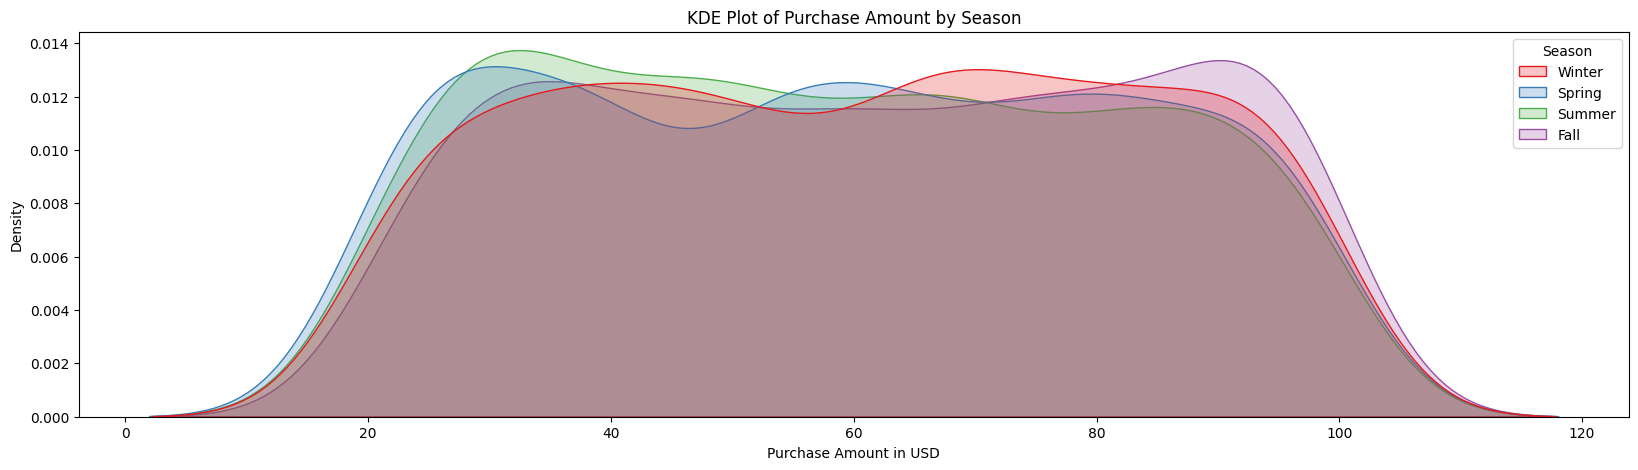

In [67]:
plt.figure(figsize=(20, 5))
sns.kdeplot(data = df, x = 'Purchase Amount (USD)', hue = 'Season', common_norm = False, fill = True, palette = 'Set1')
plt.title('KDE Plot of Purchase Amount by Season')
plt.xlabel('Purchase Amount in USD')
plt.show()

In [68]:
common_payment_fall = df[df['Season'] == 'Fall']['Payment Method'].mode()[0]
print("Most Common Payment Method for Fall Season Purchases:", common_payment_fall)

Most Common Payment Method for Fall Season Purchases: Cash


In [69]:
purchase_count_by_category = df['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)

Purchase Count by Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [70]:
avg_age_accessories_discount = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
print("Average Age of Customers who purchased Accessories with Discount Applied:", avg_age_accessories_discount)

Average Age of Customers who purchased Accessories with Discount Applied: 44.23941068139963


In [71]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


In [72]:
total_purchase_above_40_previous = df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for Customers with more than 40 Previous Purchases:", total_purchase_above_40_previous)

Total Purchase Amount for Customers with more than 40 Previous Purchases: 46590


In [73]:
common_location_socks_discount = df[(df['Item Purchased'] == 'Socks') & (df['Discount Applied'] == 'Yes')]['Location'].mode()[0]
print("Most Common Location for Socks Purchases with Discount Applied:", common_location_socks_discount)

Most Common Location for Socks Purchases with Discount Applied: Georgia


In [74]:
avg_purchase_subscription_venmo_no_promo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo') & (df['Promo Code Used'] == 'No')]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Subscription, Venmo Payment, and No Promo Code:", avg_purchase_subscription_venmo_no_promo)

Average Purchase Amount for Customers with Subscription, Venmo Payment, and No Promo Code: nan


In [75]:
common_item_high_rating_louisiana = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print("Most Common Item Purchased by High-Rating Customers in Louisiana:", common_item_high_rating_louisiana)

Most Common Item Purchased by High-Rating Customers in Louisiana: Sweater


In [76]:
common_item_high_rating_louisiana = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print("Most Common Item Purchased by High-Rating Customers in Louisiana:", common_item_high_rating_louisiana)

Most Common Item Purchased by High-Rating Customers in Louisiana: Sweater


In [77]:
common_category_low_rating_male_winter = df[(df['Gender'] == 'Male') & (df['Season'] == 'Winter') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low-Rating Male Customers in Winter Season:", common_category_low_rating_male_winter)

Most Common Category for Low-Rating Male Customers in Winter Season: Clothing


In [78]:
subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("Number of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

Number of Customers with Subscription and Promo Code Used:  1053


In [79]:
correlation_age_previous_purchases = df['Age'].corr(df['Previous Purchases'], method='pearson')
print("Pearson Correlation between Age and Previous Purchases:", correlation_age_previous_purchases)

Pearson Correlation between Age and Previous Purchases: 0.04044453114289466


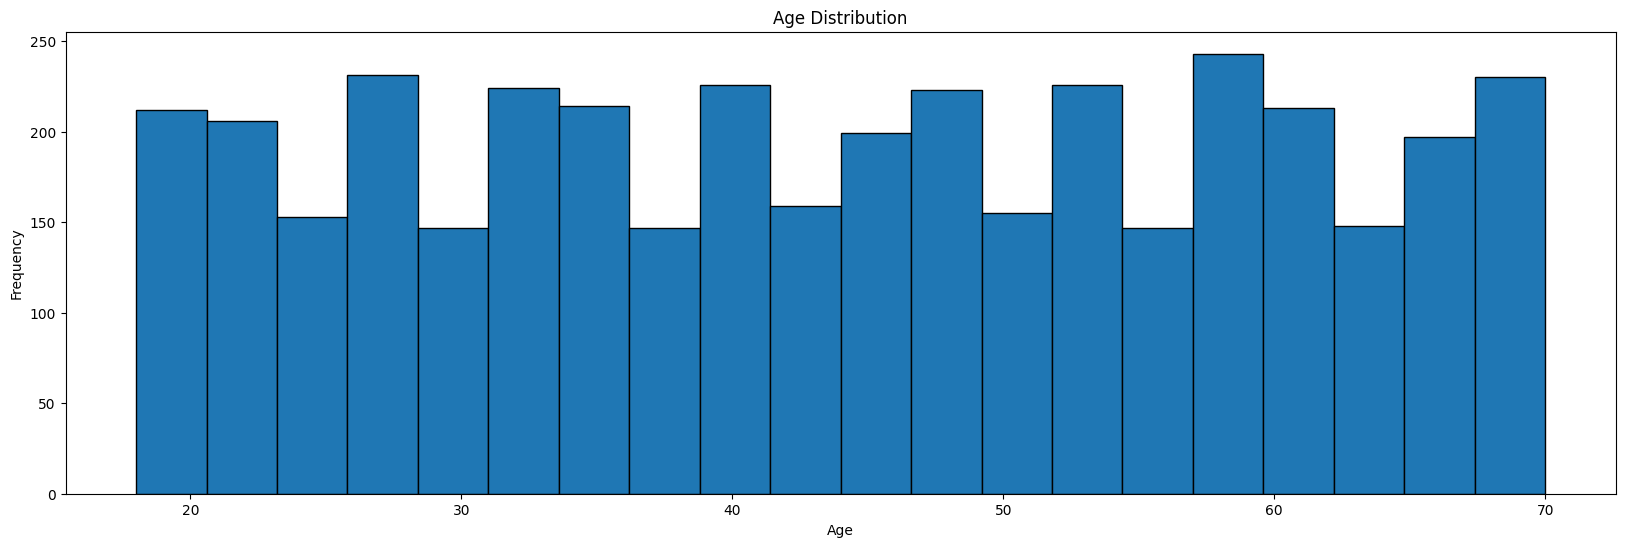

In [80]:
plt.figure(figsize = (20, 6))
plt.hist(df['Age'], bins = 20, edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

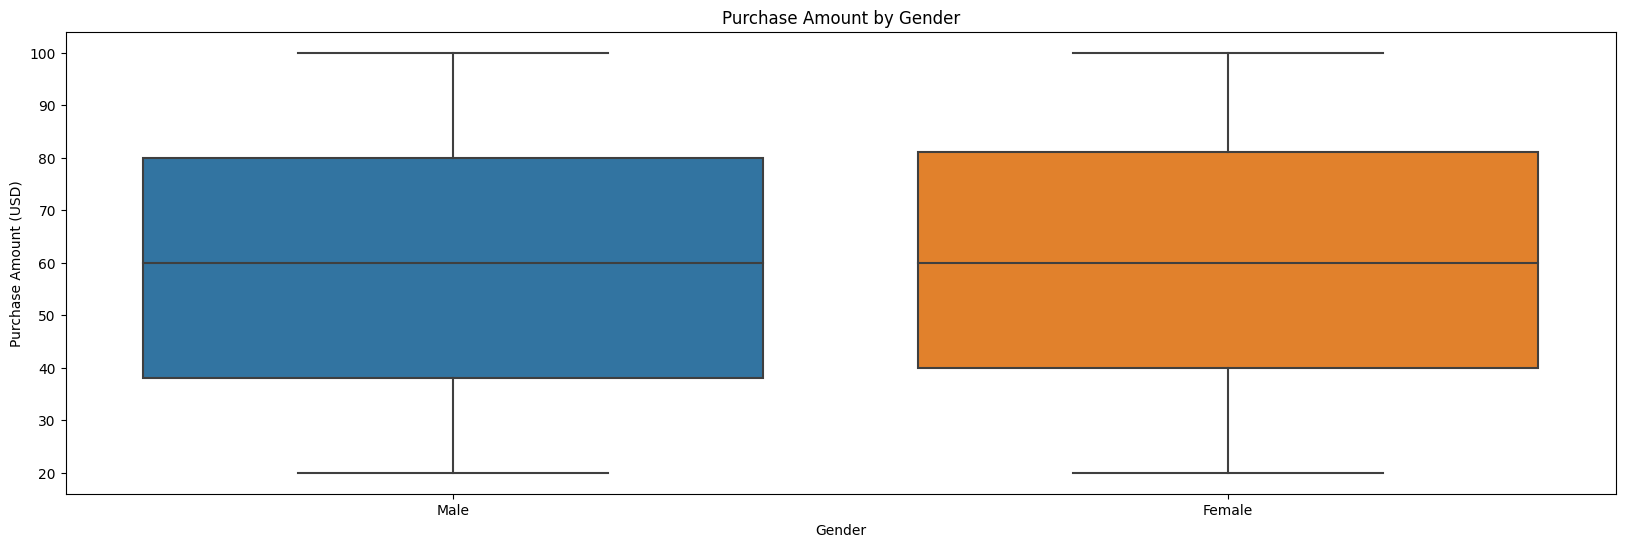

In [81]:
plt.figure(figsize = (20, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

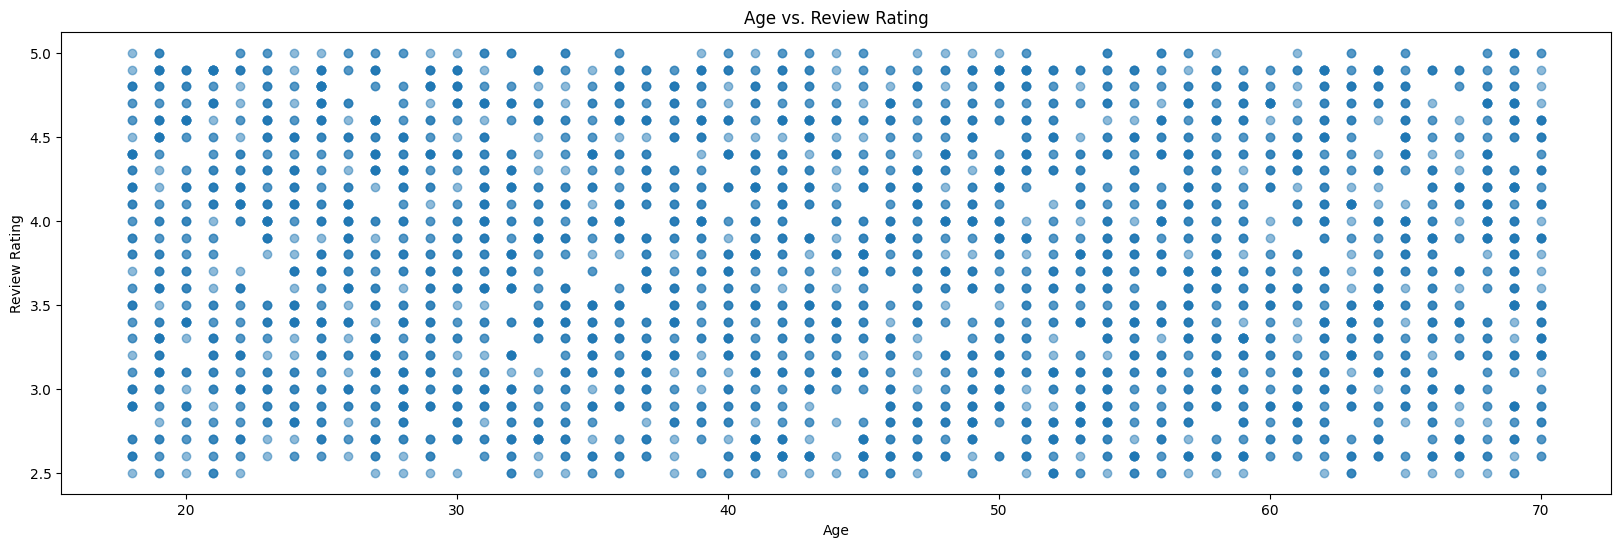

In [82]:
plt.figure(figsize = (20, 6))
plt.scatter(df['Age'], df['Review Rating'], alpha=0.5)
plt.title('Age vs. Review Rating')
plt.xlabel('Age')
plt.ylabel('Review Rating')
plt.show()

<Figure size 2000x600 with 0 Axes>

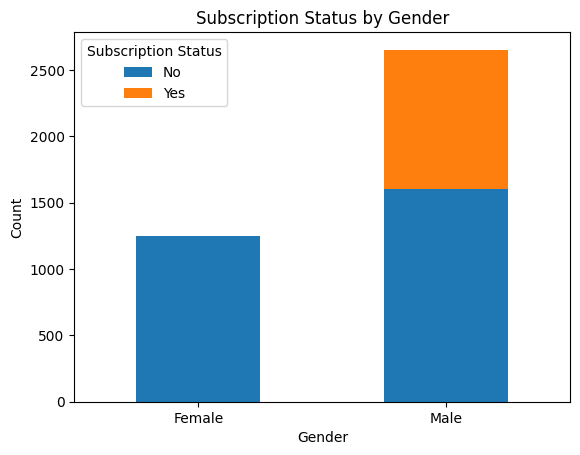

In [83]:
subscription_gender_counts = df.groupby(['Gender', 'Subscription Status']).size().unstack()
plt.figure(figsize = (20, 6))
subscription_gender_counts.plot(kind='bar', stacked=True, rot = 0);
plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show();

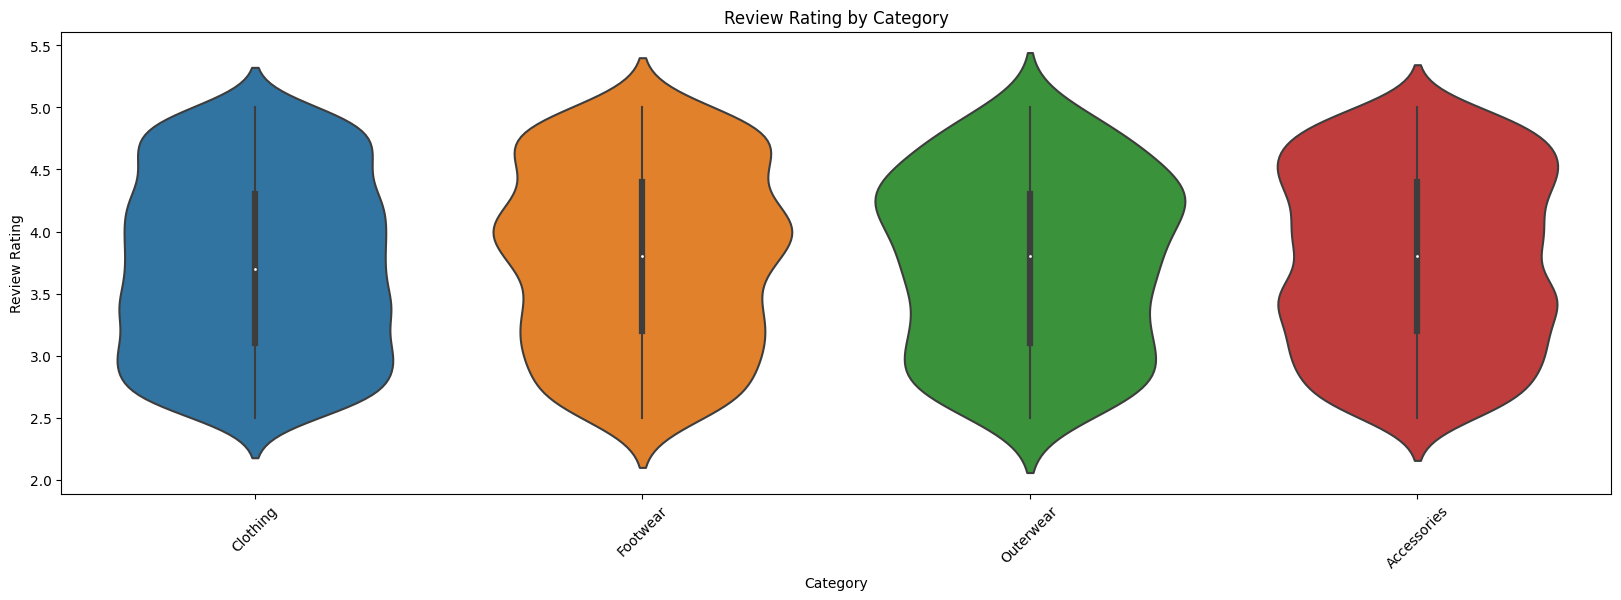

In [84]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()

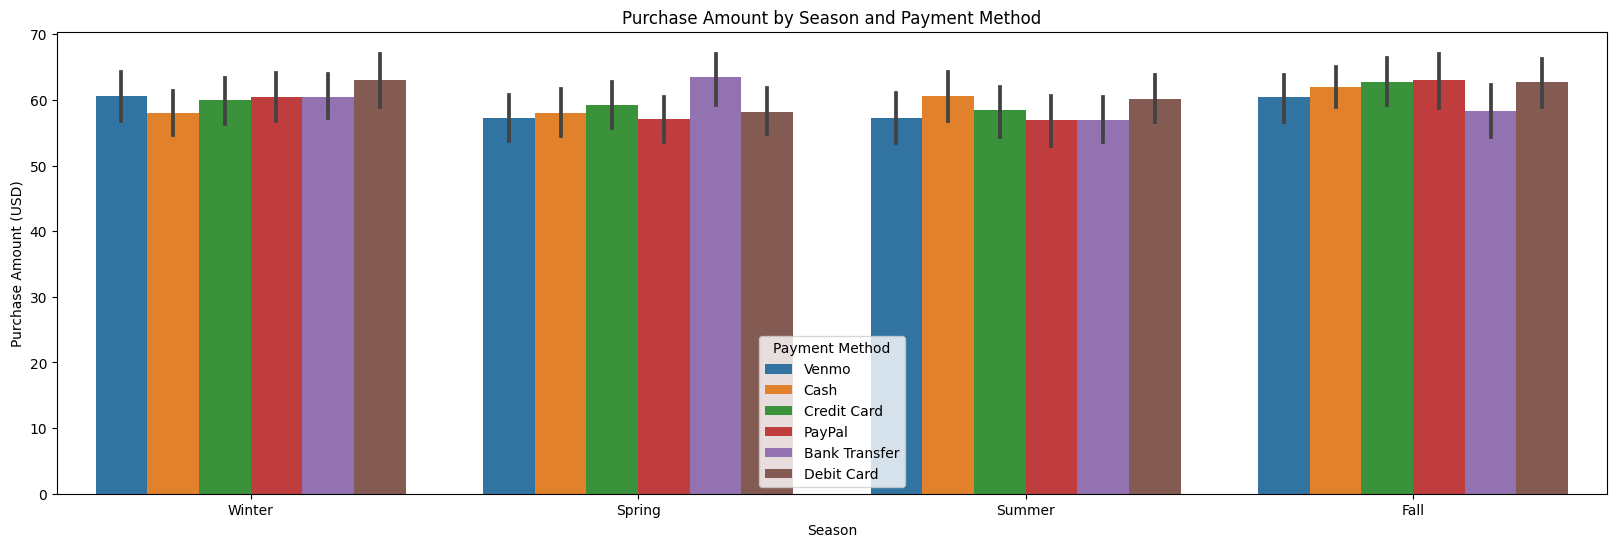

In [85]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Payment Method', data=df)
plt.title('Purchase Amount by Season and Payment Method')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation = 0)
plt.show()

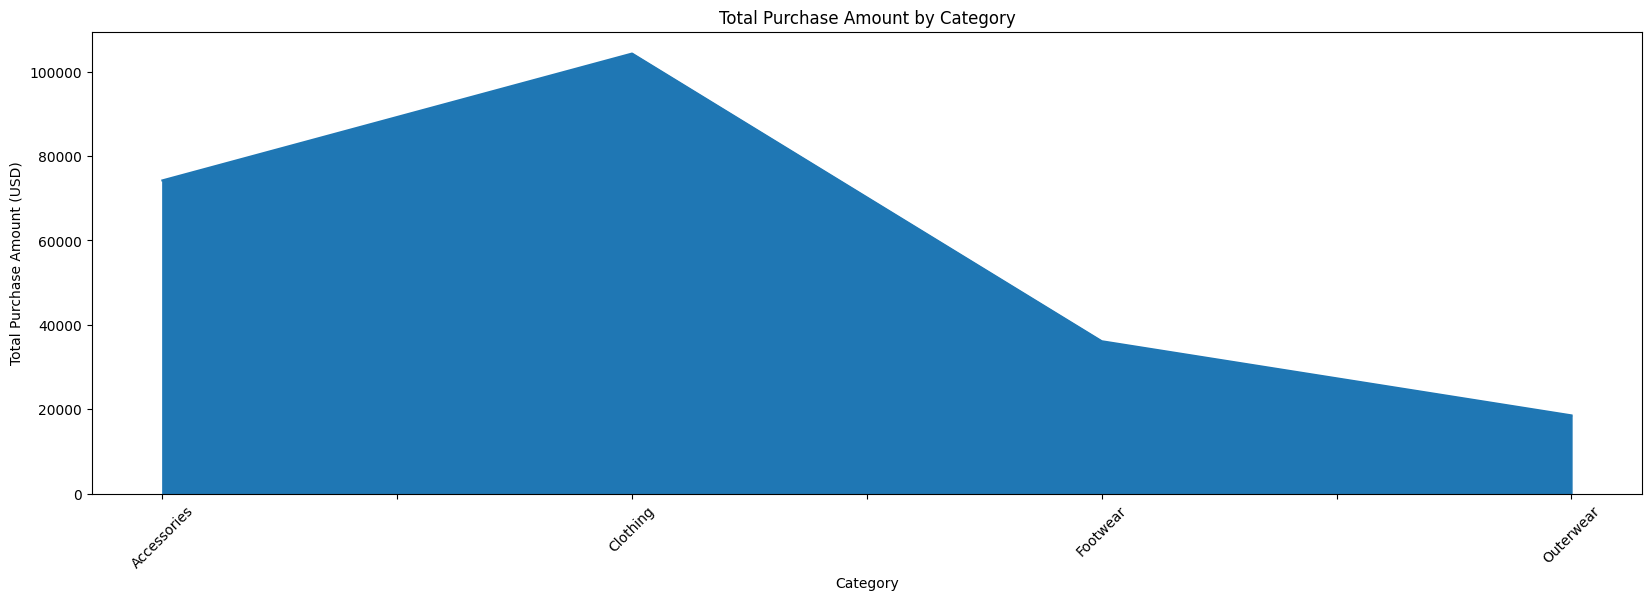

In [86]:
plt.figure(figsize=(20, 6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

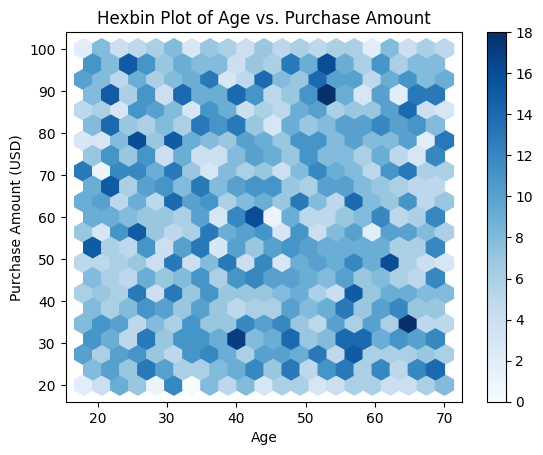

In [87]:
plt.hexbin(df['Age'], df['Purchase Amount (USD)'], gridsize=20, cmap='Blues')
plt.title('Hexbin Plot of Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.colorbar()
plt.show()

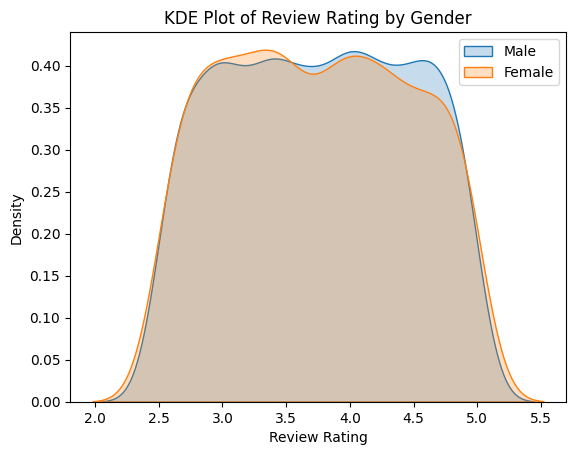

In [88]:
sns.kdeplot(df[df['Gender'] == 'Male']['Review Rating'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Review Rating'], label='Female', shade=True)
plt.title('KDE Plot of Review Rating by Gender')
plt.xlabel('Review Rating')
plt.ylabel('Density')
plt.legend()
plt.show()